In [7]:
import random
import matplotlib.pyplot as plt

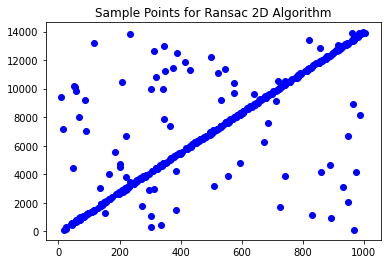

In [9]:
# Task:
# 1) Generate data set
# 2) find a, b
# 3) find garbage points
#----------------------------------

a = 14
b = -21
n = 400
garbageProcent = 0.21
# (1 - garbageProcent) * n pair of point <x, y> where y = a * x + b
# garbageProcent * n random pair of points <x, y>
# y' = y + N(mat, disp)

data = []
maxY = 0
for i in range(n):
    x = random.randint(0, 1000)
    y = a * x + b
    maxY = max(maxY, y)
    data.append((x + random.randint(0, 1000/100), y + random.randint(0, 1000/100)))

for i in range(int(n * garbageProcent)):
    x = random.randint(0, 1000)
    y = random.randint(0, maxY)
    data[int(random.randint(0, n - 1))] = (x, y)


allpoints = data
for point in allpoints:
    plt.scatter(point[0], point[1], color="blue")
plt.title('Sample Points for Ransac 2D Algorithm')
plt.show()

In [10]:
#function to generate pair of random indices
def generateRandomIndicesPair():
    if len(allpoints) <= 1:
        return "Error"
    index1 = random.randint(0, len(allpoints)-1)
    index2 = random.randint(0, len(allpoints)-1)
    while index1 == index2:
        index2 = random.randint(0,len(allpoints)-1)

    return(index1, index2)

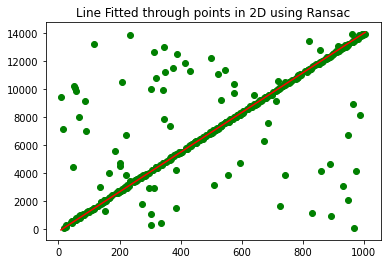

inliers count = 78


In [11]:
numberOfIterations = 100
tolerance = 1
maximum_inlierscount = 0
coefficients = []

for iteration in range(0, numberOfIterations):
    (index1, index2) = generateRandomIndicesPair()
    #find the coefficients for the line
    #equation of line passing through two points is given by (y1 -y2)*X + (x2 - x1)*Y + (x1*y2 - y1*x2) = 0
    A = allpoints[index1][1] - allpoints[index2][1]
    B = allpoints[index2][0] - allpoints[index1][0]
    C = allpoints[index1][0]*allpoints[index2][1] - allpoints[index1][1]*allpoints[index2][0]
    
    #find the count of points lying within tolerance of this line
    inlierscount = 0
    for i in range(0, len(allpoints)):
        #perpendicular distance of point x1, y1 from line Ax + By + C = 0 is |Ax1 + By1 + C|/sqrt(A^2 + B^2)
        distance = abs(A*allpoints[i][0] + B*allpoints[i][1] + C)/(pow(A*A + B*B, 0.5))
        if distance < tolerance:
            inlierscount += 1
    if inlierscount > maximum_inlierscount:
        coefficients = [A, B, C]
        maximum_inlierscount = inlierscount

for point in allpoints:
    plt.scatter(point[0], point[1], color="green")
A = coefficients[0]
B = coefficients[1]
C = coefficients[2]

allxvalues = [point[0] for point in allpoints]

xvalues = [min(allxvalues), max(allxvalues)]
yvalues = [(-C-A*xvalues[0])/B, (-C-A*xvalues[1])/B]

plt.plot(xvalues, yvalues, color="red")
plt.title('Line Fitted through points in 2D using Ransac')
plt.show()

print("inliers count = {0}".format(maximum_inlierscount))